In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [82]:
def getData(path):
    df = pd.read_csv(path, sep=',', header=0, index_col=0)
    return df
bmr = getData('/Users/Sidney/Dropbox/siv/data/determinants/bodymass.csv')
hgd = getData('/Users/Sidney/Dropbox/siv/data/determinants/hostdistance.csv')
ar = getData('/Users/Sidney/Dropbox/siv/beast/discreteTraits/h24/asymmetric/original/logfile_analysis/hostMatrix_2016-03-21_actualRates.csv')

names = pickle.load(open('../common_names.p', 'rb'))

names = { v:k for k,v in names.items()}
names['Chimp_pts'] = 'Pan_troglodytes_schweinfurthii'
ar.rename(index=names, columns=names, inplace=True)

mean = ar.stack().mean()
stddev = ar.stack().std()

norm = lambda x: (float(x) - float(mean)) / float(stddev)
ar = ar.applymap(norm)



In [87]:
ar_vals = []
bmr_vals = []
hgd_vals = []

hosts = ar.columns.values

for from_host in hosts:
    for to_host in hosts:
        if from_host == to_host:
            continue
        else:
            ar_vals.append(ar.at[from_host, to_host])
            bmr_vals.append(bmr.at[from_host, to_host])
            hgd_vals.append(hgd.at[from_host, to_host])
assert len(ar_vals)==len(bmr_vals)
assert len(hgd_vals)==len(bmr_vals)

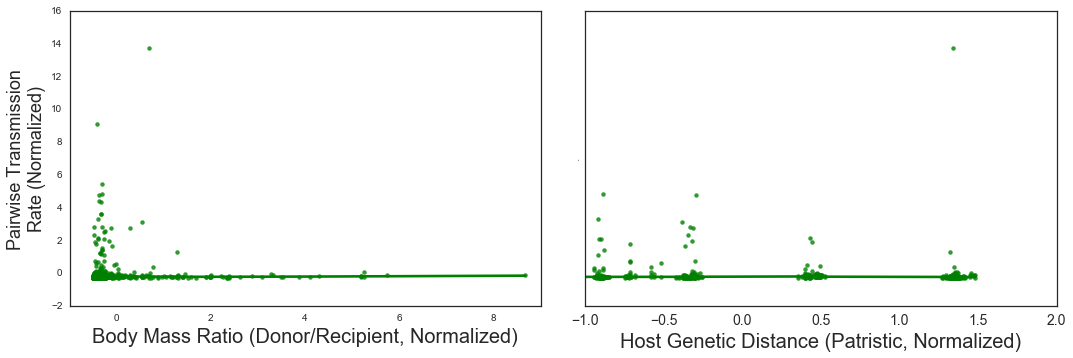

In [91]:
fig, (bmr_ax, hgd_ax) = plt.subplots(figsize=(15,5),nrows=1,ncols=2,sharey=True, facecolor='w')

sns.regplot(pd.Series(bmr_vals), pd.Series(ar_vals), color='g', lowess=True, ax=bmr_ax)
sns.set_style('white')

sns.regplot(pd.Series(hgd_vals), pd.Series(ar_vals), color='g', ax=hgd_ax, lowess=True)

hgd_ax.set_xlabel('Host Genetic Distance (Patristic, Normalized)', size=20)
bmr_ax.set_ylabel('Pairwise Transmission\nRate (Normalized)', size=18)
bmr_ax.set_xlabel('Body Mass Ratio (Donor/Recipient, Normalized)', size=20)
hgd_ax.set_ylabel(None, size=0)

bmr_ax.set_xlim(-1, 9)
hgd_ax.set_xlim(-1, 2)
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Figure 4: Cross-species transmission is driven by exposure and constrained by host genetic distance.  
LOWESS fit illustrating the relationship between the asymmetric transmission rates between each pair of hosts vs. **A** the ratio of body masses (donor / recipient host) and **B** the genetic distance between the hosts.

### To Do:  
* Fighting with the stupid axis ticks has destroyed 45 minutes already.  
* Try adjusting the body mass ratios by a binary indicator of predation to improve fit.